In [171]:
# importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm

In [2]:
# reading the data frame
amz = pd.read_csv(r'C:\Users\User\Desktop\Bussiness\Programacao\Estudos\Ironhack\mz_uk_price_prediction_dataset.csv')
amz

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:
# makng the counting tab
tab = pd.crosstab(amz['category'], amz['isBestSeller'], normalize='index')
display(tab)
ctab = pd.crosstab(amz['category'], amz['isBestSeller'])
ctab

isBestSeller,False,True
category,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999508,0.000492
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,0.999411,0.000589
Adapters,0.988189,0.011811
...,...,...
Wind Instruments,0.972000,0.028000
Window Treatments,0.979079,0.020921
Women,0.988015,0.011985


isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [4]:
# changing columns name to avoid problems
tab.rename(columns= {False: 'no', True: 'yes'}, inplace=True)
tab

isBestSeller,no,yes
category,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999508,0.000492
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,0.999411,0.000589
Adapters,0.988189,0.011811
...,...,...
Wind Instruments,0.972000,0.028000
Window Treatments,0.979079,0.020921
Women,0.988015,0.011985


In [5]:
# find prevalence per category and setting how much it is present in the table.

print(f"""
There is no prevalency, the percentage of best seller per category 
there is 2% prevelent in his category is only in {round(len(tab[tab['yes']> 0.02])/len(tab)*100, 2)}% of all categories.
""")
display(tab[tab['yes']> 0.02])


There is no prevalency, the percentage of best seller per category 
there is 2% prevelent in his category is only in 7.43% of all categories.



isBestSeller,no,yes
category,,
Arts & Crafts,0.975914,0.024086
Baby,0.977342,0.022658
Bakeware,0.974895,0.025105
Bedding Accessories,0.975610,0.024390
"Billiard, Snooker & Pool",0.967871,0.032129
Grocery,0.941865,0.058135
Health & Personal Care,0.942314,0.057686
Home Brewing & Wine Making,0.971545,0.028455
Kitchen Linen,0.979339,0.020661


In [6]:
# Chi-square
stat, pvalue, _, _ = chi2_contingency(ctab)

print(f"""
There is corelation between the category and the best-sellers
distribution the p-value is {"{:.50f}".format(pvalue)}
""")



There is corelation between the category and the best-sellers
distribution the p-value is 0.00000000000000000000000000000000000000000000000000



In [7]:
# Cramer's V
association(ctab, method="cramer")
print(f"""
Dispite of the association, the strenght of it is only {round(association(ctab, method="cramer"),2)}
which is too insignificant.
""")


Dispite of the association, the strenght of it is only 0.12
which is too insignificant.



<Axes: xlabel='category'>

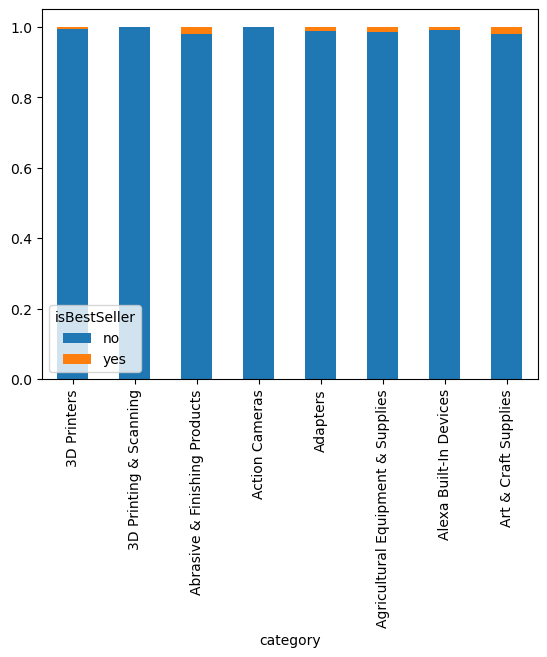

In [8]:
tab.head(8).plot(kind='bar', stacked=True)

In [16]:
amz.select_dtypes('number').nunique()

uid                  2443651
stars                     42
reviews                19446
price                  82916
boughtInLastMonth         25
dtype: int64

In [ ]:
def outliers(df):
    columns= [x for x in df.select_dtypes('number')]

    count= {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        higher = Q3 + 1.5*IQR
    outliers = amz[(amz['price']<lower) | (amz['price']>higher)].index


In [46]:
# Remove outliers in product prices

Q1 = amz['price'].quantile(0.25)
Q3 = amz['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
higher = Q3 + 1.5*IQR

outliers = amz[(amz['price']<lower) | (amz['price']>higher)].index

amz.drop(outliers, inplace=True)
amz

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [57]:
amz['category'].value_counts().head(20).index[0]

'Sports & Outdoors'

In [113]:
# filtering the top 20
topcate = amz[amz['category'].isin(amz['category'].value_counts().index[:20])]
topcate['category']

19513      Handmade Home & Kitchen Products
19514      Handmade Home & Kitchen Products
19515      Handmade Home & Kitchen Products
19516      Handmade Home & Kitchen Products
19517      Handmade Home & Kitchen Products
                         ...               
2429088                   Sports & Outdoors
2429089                   Sports & Outdoors
2429090                   Sports & Outdoors
2437153                   Sports & Outdoors
2437154                   Sports & Outdoors
Name: category, Length: 1033008, dtype: object

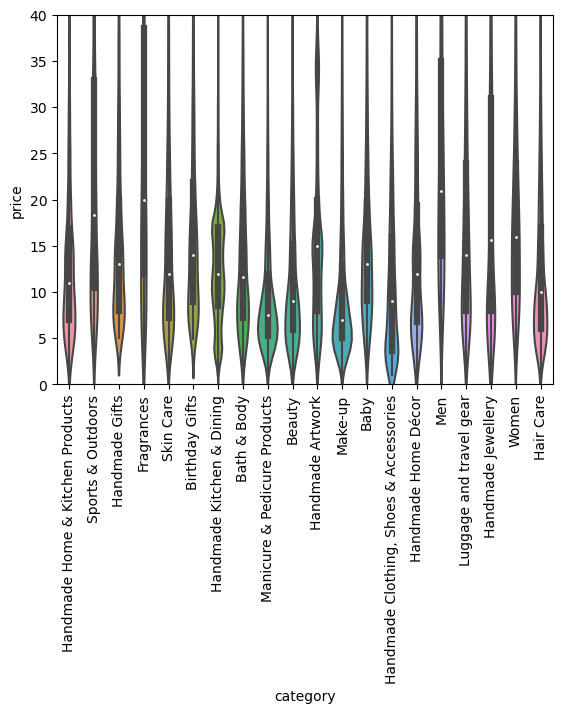

In [116]:
# violin plot price by catgory
sns.violinplot(x= topcate['category'], y= topcate['price'])
plt.xticks(rotation= 90)
plt.ylim(0,40)
plt.show()

In [153]:
# the highest median value by price

amz.groupby('category').agg({'price': 'median'}).sort_values('price', ascending=False)

,price
category,
Desktop PCs,74.00
Boxing Shoes,69.79
Tablets,69.00
Graphics Cards,68.54
Motherboards,67.92
...,...
Adapters,7.05
Make-up,7.00
Signs & Plaques,6.99


In [154]:
# filtering the top 10
top10 = amz[amz['category'].isin(amz['category'].value_counts().index[:10])]
top10

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


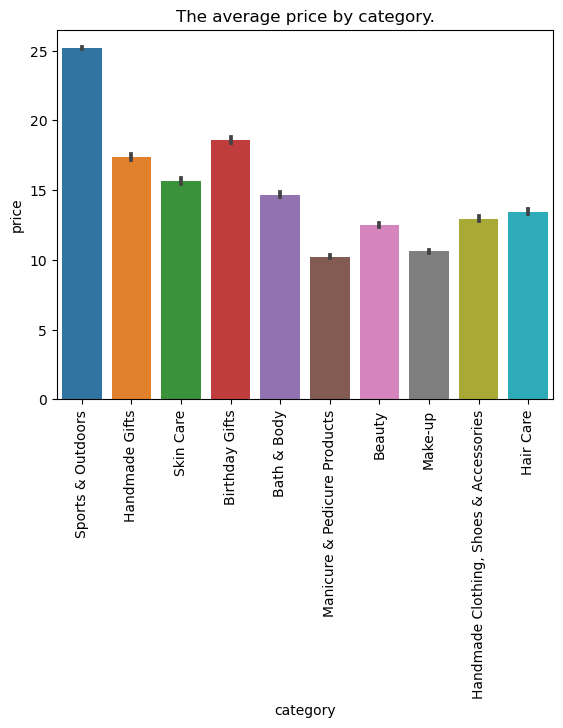

In [158]:
# ploting the barplot showing mean price
sns.barplot(top10, x= 'category', y= 'price')
plt.xticks(rotation=90)
plt.title('The average price by category.')
plt.show()

In [159]:
# finding the highest mean per category
amz.groupby('category').agg({'price': 'mean'}).sort_values('price', ascending=False)

,price
category,
Motherboards,68.772432
Boxing Shoes,67.417803
Desktop PCs,66.915562
Tablets,66.552971
Graphics Cards,65.103509
...,...
Bedding Accessories,8.835220
Adapters,8.750197
Signs & Plaques,8.210513


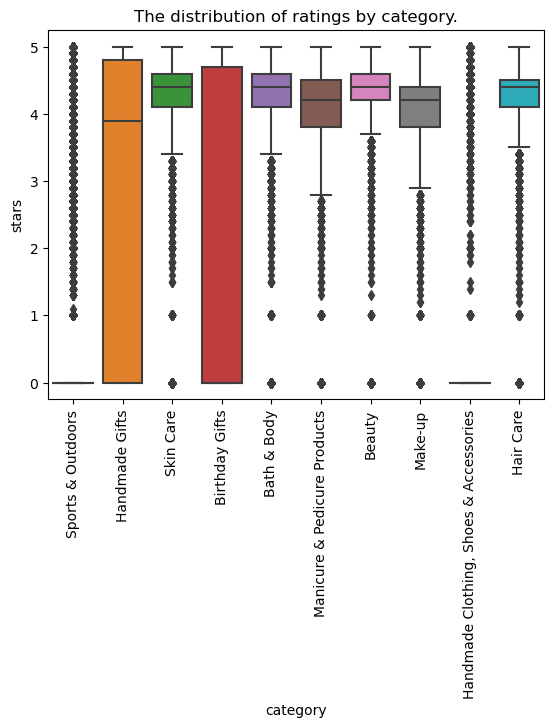

In [162]:
# already got the filter from previous cell, ploting box plot by ratings per category
sns.boxplot(top10, x= 'category', y= 'stars')
plt.xticks(rotation=90)
plt.title('The distribution of ratings by category.')
plt.show()

In [164]:
# finding the highest median ratings per category
amz.groupby('category').agg({'stars': 'median'}).sort_values('stars', ascending=False)

,stars
category,
Computer Memory,4.7
Building & Construction Toys,4.6
Office Paper Products,4.6
Luxury Food & Drink,4.6
Kids' Play Figures,4.6
...,...
Hockey Shoes,0.0
Hi-Fi Receivers & Separates,0.0
Handmade Kitchen & Dining,0.0


In [166]:
# calculating correlation coefficents
# pearson
pearson = amz['price'].corr(amz['stars'])

# spearman
spearman = amz['price'].corr(amz['stars'], method= 'spearman')

pearson, spearman

print(f"""There is no significant correlation between the price and rating
      actually it is possible to observe a weak reverse correlation in both
      pearson: {pearson} and spearman: {spearman}. 
""")

There is no significant correlation between the price and rating
      actually it is possible to observe a weak reverse correlation in both
      pearson: -0.07767299878178476 and spearman: -0.06679697280756669. 



<Axes: xlabel='stars', ylabel='price'>

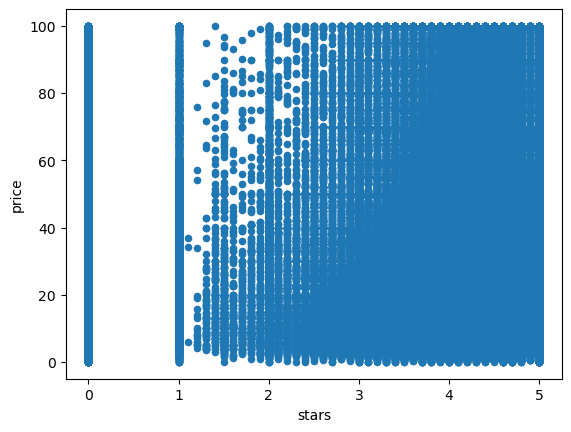

In [169]:
# scatter plots to vizualize the correlation between ratings and price
amz.plot(kind= 'scatter', x= 'stars', y= 'price')
# there is no defined patterns

C:\Users\User\AppData\Local\Temp\ipykernel_6024\4084535802.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  allCorr = amz.corr()


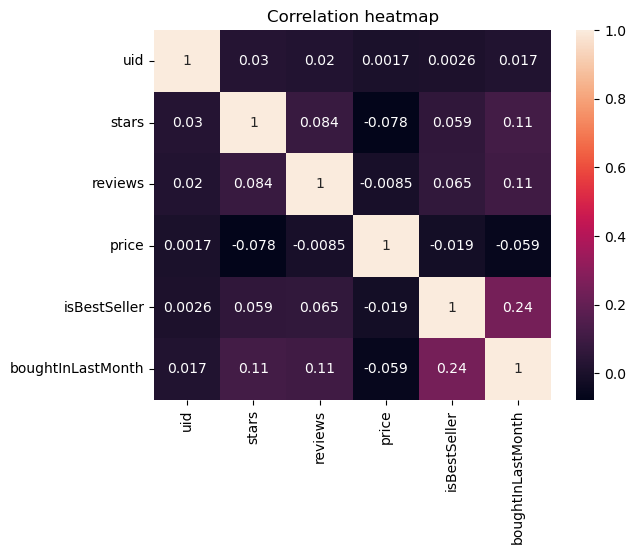

In [170]:
# Making a correlation between all columns and ploting the heatmap
allCorr = amz.corr()

sns.heatmap(allCorr, annot=True)
plt.title("Correlation heatmap")
plt.show()

Clearly price values does not follow the usual normal distribution


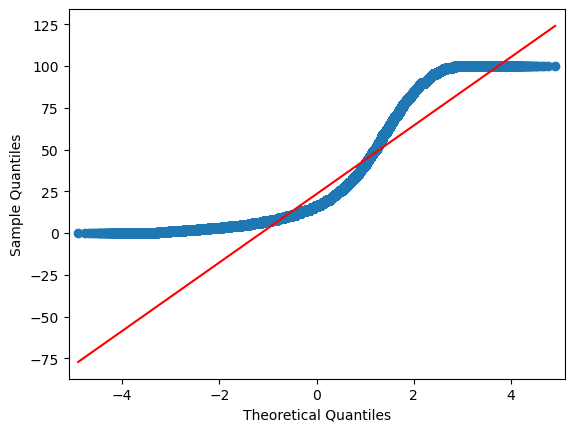

In [174]:
# analizing if there us a normal distribution with QQ plot
sm.qqplot(amz['price'],  line='s')
print('Clearly price values does not follow the usual normal distribution')